In [8]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [38]:
# Visualizar las primeras filas del dataset
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,GrupoEdad
0,1,0,3,22.000000,1,0,7.2500,True,Adultos
1,2,1,1,38.000000,1,0,71.2833,False,Adultos
2,3,1,3,26.000000,0,0,7.9250,False,Adultos
3,4,1,1,35.000000,1,0,53.1000,False,Adultos
4,5,0,3,35.000000,0,0,8.0500,True,Adultos
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,True,Adultos
887,888,1,1,19.000000,0,0,30.0000,False,Adolescentes
888,889,0,3,29.699118,1,2,23.4500,False,Adultos
889,890,1,1,26.000000,0,0,30.0000,True,Adultos


In [10]:
# Eliminar columnas irrelevantes o con datos faltantes
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [11]:
# Manejar datos faltantes (en este caso, rellenar los valores faltantes con la media)
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1, 1))

In [12]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

In [13]:
# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop('Survived', axis=1)
y = data['Survived']
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)
# Crear el modelo de clasificación (Regresión Logística)
model = LogisticRegression(max_iter=1000)

In [14]:
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Realizar predicciones
predictions = model.predict(X_test)

In [16]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

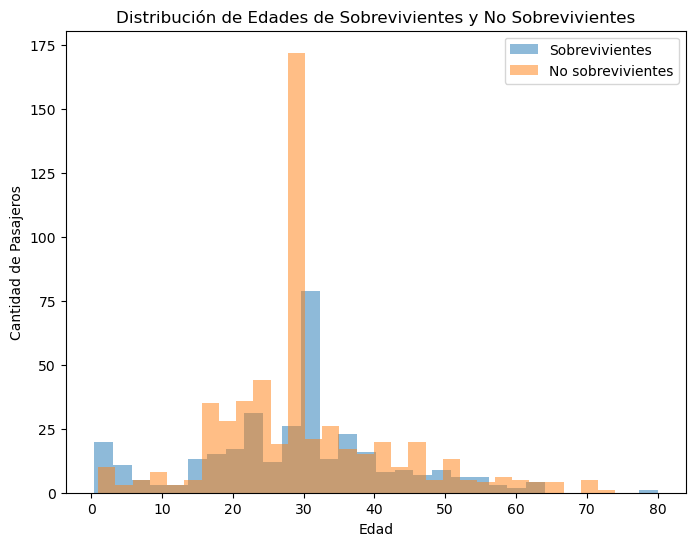

In [18]:
# Visualización: Histograma de edades
plt.figure(figsize=(8, 6))
plt.hist(data[data['Survived'] == 1]['Age'], bins=30, alpha=0.5, 
label='Sobrevivientes')
plt.hist(data[data['Survived'] == 0]['Age'], bins=30, alpha=0.5, 
label='No sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Distribución de Edades de Sobrevivientes y No Sobrevivientes')
plt.legend()
plt.show()

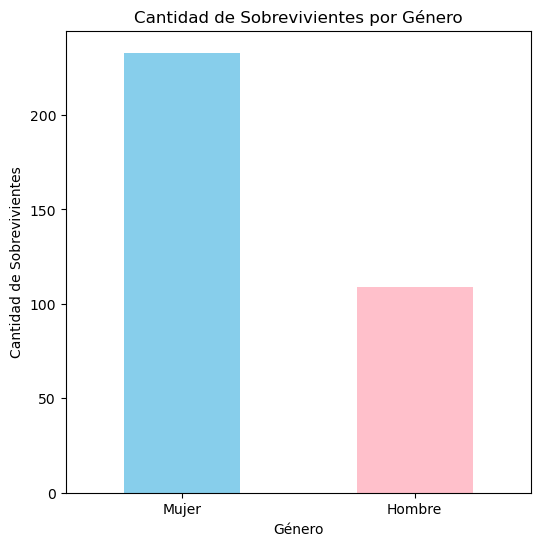

In [19]:
# Visualización: Gráfico de barras de la cantidad de sobrevivientes por género
survived_gender = data.groupby('Sex_male')['Survived'].sum()
plt.figure(figsize=(6, 6))
survived_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.xticks([0, 1], ['Mujer', 'Hombre'], rotation=0)
plt.xlabel('Género')
plt.ylabel('Cantidad de Sobrevivientes')
plt.title('Cantidad de Sobrevivientes por Género')
plt.show()

In [27]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

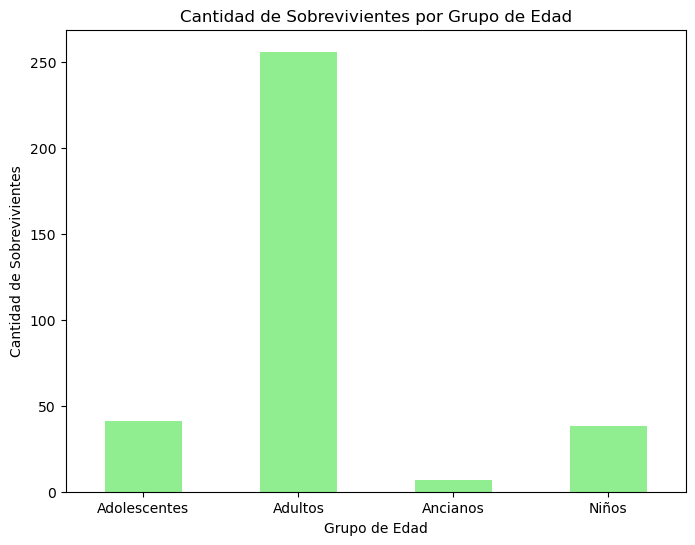

In [28]:
# Clasificar a las personas en grupos de edad
def clasificar_edad(edad):
    if edad > 0 and edad < 10:
        return 'Niños'
    elif edad < 20:
        return 'Adolescentes'
    elif edad < 60:
        return 'Adultos'
    else:
        return 'Ancianos'

data['GrupoEdad'] = data['Age'].apply(clasificar_edad)

# Contar el número de sobrevivientes en cada grupo de edad
sobrevivientes_grupo_edad = data[data['Survived'] == 1].groupby('GrupoEdad').size()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sobrevivientes_grupo_edad.plot(kind='bar', color='lightgreen')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Sobrevivientes')
plt.title('Cantidad de Sobrevivientes por Grupo de Edad')
plt.xticks(rotation=0)
plt.show()

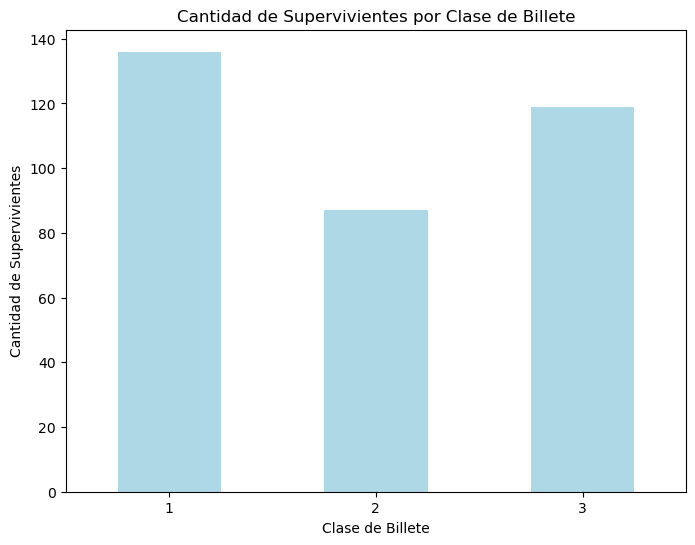

In [24]:
# Agrupar los datos por clase de billete y contar el número de supervivientes
survived_pclass = data.groupby('Pclass')['Survived'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
survived_pclass.plot(kind='bar', color='lightblue')
plt.xlabel('Clase de Billete')
plt.ylabel('Cantidad de Supervivientes')
plt.title('Cantidad de Supervivientes por Clase de Billete')
plt.xticks(rotation=0)
plt.show()

In [34]:
df = data.groupby('Pclass')

In [37]:
df['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


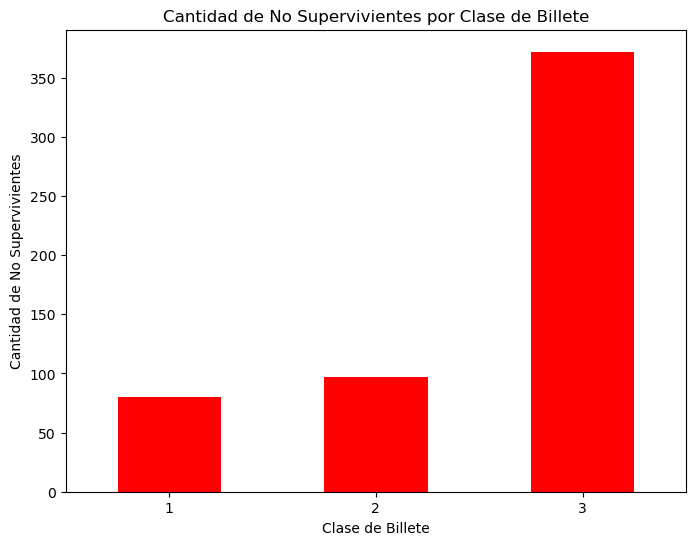

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


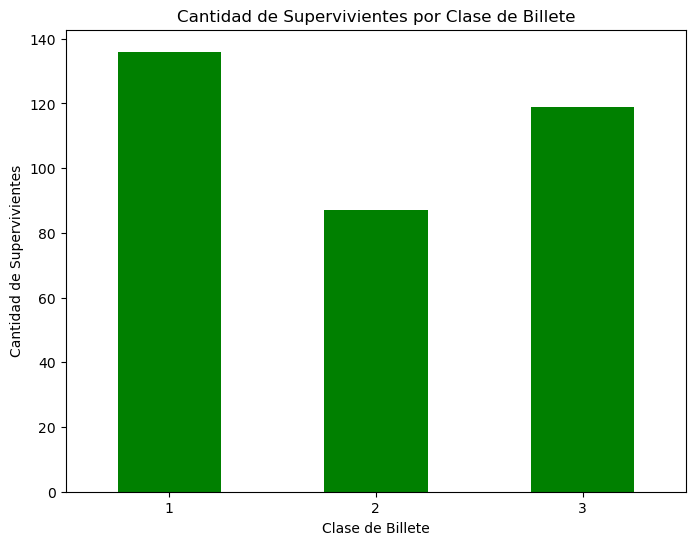

In [47]:
# Agrupar los datos por clase de billete y contar el número de no supervivientes
no_survived_pclass = data[data['Survived'] == 0].groupby('Pclass')['Survived'].count()
print(no_survived_pclass)

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
no_survived_pclass.plot(kind='bar', color='red')
plt.xlabel('Clase de Billete')
plt.ylabel('Cantidad de No Supervivientes')
plt.title('Cantidad de No Supervivientes por Clase de Billete')
plt.xticks(rotation=0)
plt.show()

# Agrupar los datos por clase de billete y contar el número de supervivientes
survived_pclass = data[data['Survived'] == 1].groupby('Pclass')['Survived'].count()
print(survived_pclass)

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
survived_pclass.plot(kind='bar', color='green')
plt.xlabel('Clase de Billete')
plt.ylabel('Cantidad de Supervivientes')
plt.title('Cantidad de Supervivientes por Clase de Billete')
plt.xticks(rotation=0)
plt.show()

Matriz de Confusión:
[[92 13]
 [21 53]]


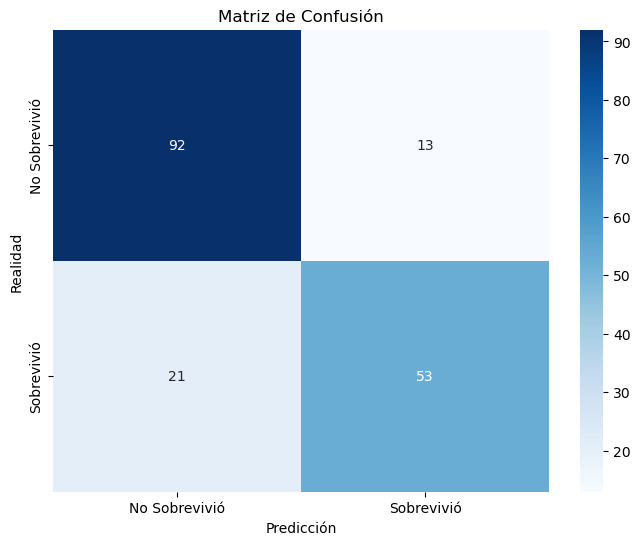

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

print('Matriz de Confusión:')
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

In [29]:

# Imprimir la precisión del modelo y el informe de clasificación
print(f'Precisión del modelo: {accuracy}')
print('Informe de clasificación:')
print(report)

Precisión del modelo: 0.8100558659217877
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

